(206,)


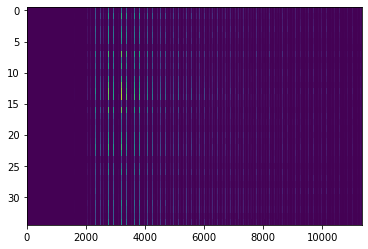


(30, 11330)
(30, 3)
Gominy    35.878883
Tyr        0.254144
Trp        0.355874
dtype: float64
Правильность на тестовом наборе: 0.72


In [92]:
from gzip import open # NB: overrides standard open()
import pickle as pkl
import tensorly as tl
from tensorly.base import tensor_to_vec,  partial_tensor_to_vec
import numpy as np
import pandas as pd
import warnings 
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

warnings.simplefilter('ignore') # отключим предупреждения Anaconda
Xdata_numpy = pkl.load(open('C:/Users/admin/Desktop/88/X.pkl.gz', 'rb'))
Ydata = pkl.load(open('C:/Users/admin/Desktop/88/y.pkl.gz', 'rb'))
print(Xdata_numpy['emission'].shape)
string_name=[]
string_name2=[]
k=0
#создаю пространство имён для развёрнутого тензора
for i in range(len(Xdata_numpy['emission'])):
    for j in range(len(Xdata_numpy['excitation'])):
        string_name+=[str(Xdata_numpy['emission'][i])+" x "+str(Xdata_numpy['excitation'][j])]
        string_name2+=[k]
        k+=1
#создаём пространство образцов
examples_names=[]
v=[]
for i in range(0,35):
    examples_names+=[str(i)]
    v+=[i]
Xdata_numpy['X'].shape = (Xdata_numpy['X'].shape[0], Xdata_numpy['X'].shape[1] * Xdata_numpy['X'].shape[2])
Xdata_numpy['X'][:,np.isnan(Xdata_numpy['X']).any(axis = 0)] = 0 # zero out any columns containing NaN

#рисуем новую матрицу
import matplotlib.pyplot as plt
plt.imshow(Xdata_numpy['X'],aspect="auto")
plt.show();
print()

X=pd.DataFrame(Xdata_numpy['X'],index=examples_names, columns=string_name)
#делим набор на обучающий и тестовый
X_train, X_test, y_train, y_test = train_test_split(
     X, Ydata, test_size=0.1428 
)
print(X_train.shape)
print(y_train.shape)
s=[]

#начинаем применять
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV
parametrsNames=[{'ee':string_name2}]

pls2 = PLSRegression()
parametrsNames={
    'copy': [True], 
    'max_iter': [10000], 
    'n_components': range(1,101), 
    'scale': [True], 
    'tol': [1e-06]
}
gridCought=GridSearchCV(pls2, parametrsNames, cv=5)
gridCought.fit(X_train,y_train)
predictors=gridCought.predict(X_test)
s=np.mean((predictors-y_test)**2)

print(s)

print("Правильность на тестовом наборе: {:.2f}".format(gridCought.score(X_test, y_test)))



In [99]:
print("Наилучшее значение кросс-валидац. правильности: {:.2f}".format(gridCought.best_score_))

Наилучшее значение кросс-валидац. правильности: 0.67


In [103]:
results = pd.DataFrame(gridCought.cv_results_) 
# показываем первые 5 строк 
display(results.head()) 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_copy,param_max_iter,param_n_components,param_scale,param_tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.026318,0.004213,0.006800,0.002404,True,10000,1,True,1e-06,"{'copy': True, 'max_iter': 10000, 'n_component...",0.666163,-0.004875,0.409318,0.647283,0.162775,0.376133,0.264359,100
1,0.034815,0.002932,0.005609,0.001528,True,10000,2,True,1e-06,"{'copy': True, 'max_iter': 10000, 'n_component...",0.716950,0.037056,0.475849,0.801628,0.307884,0.467873,0.277379,9
2,0.038022,0.004005,0.003612,0.000790,True,10000,3,True,1e-06,"{'copy': True, 'max_iter': 10000, 'n_component...",0.781781,0.495242,0.567928,0.831857,0.192805,0.573923,0.228566,4
3,0.044021,0.003813,0.005416,0.001390,True,10000,4,True,1e-06,"{'copy': True, 'max_iter': 10000, 'n_component...",0.822797,0.605900,0.496713,0.835669,-0.154447,0.521326,0.361697,8
4,0.060644,0.006191,0.007198,0.001598,True,10000,5,True,1e-06,"{'copy': True, 'max_iter': 10000, 'n_component...",0.842269,0.723796,0.715888,0.898318,0.187563,0.673567,0.252779,1


In [104]:
scores = np.array(results.mean_test_score).reshape(100, 1) 
import mglearn 
# строим теплокарту средних значений правильности перекрестной проверки 
mglearn.tools.heatmap(scores, xlabel='n_components', xticklabels=parametrsNames['n_components'], 
                      ylabel='max_iter', yticklabels=parametrsNames['max_iter'], cmap="viridis")

ModuleNotFoundError: No module named 'mglearn'

In [91]:
from  sklearn.metrics import  mean_squared_error
final_mse = mean_squared_error (y_test,  predictors) 
final_rmse  =  np.sqrt(final_mse)  
print(final_rmse)

2.1729738522178064


In [71]:
type(y_test)

pandas.core.frame.DataFrame

In [73]:
print(predictors[:,0])
print(y_test.iloc[:,0])


[48.71776277 39.30983219 39.72902876 49.42186995 35.0537506 ]
18    43.272738
20    34.193088
26    36.909160
0     45.446791
8     35.354605
Name: Gominy, dtype: float64


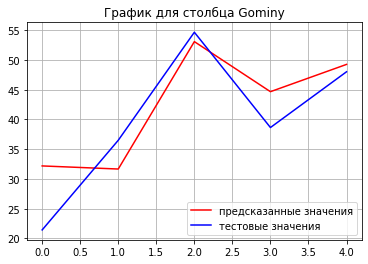

In [105]:
b=[]
for  i in range(0,5):
    b+=[i]
plt.plot(b,predictors[:,0],color="red",label="предсказанные значения")
plt.plot(b,y_test.iloc[:,0],color="blue", label="тестовые значения")
plt.legend()
plt.grid(True)
plt.title("График для столбца Gominy")
plt.show();


In [106]:
cvres  =  gridCought.cv_results_ 
for mean_score,  params  in zip (cvres [ "mean_test_score" ], cvres [ "params" ] ): 
    print (np.sqrt(-mean_score),  params)


nan {'copy': True, 'max_iter': 10000, 'n_components': 1, 'scale': True, 'tol': 1e-06}
nan {'copy': True, 'max_iter': 10000, 'n_components': 2, 'scale': True, 'tol': 1e-06}
nan {'copy': True, 'max_iter': 10000, 'n_components': 3, 'scale': True, 'tol': 1e-06}
nan {'copy': True, 'max_iter': 10000, 'n_components': 4, 'scale': True, 'tol': 1e-06}
nan {'copy': True, 'max_iter': 10000, 'n_components': 5, 'scale': True, 'tol': 1e-06}
nan {'copy': True, 'max_iter': 10000, 'n_components': 6, 'scale': True, 'tol': 1e-06}
nan {'copy': True, 'max_iter': 10000, 'n_components': 7, 'scale': True, 'tol': 1e-06}
nan {'copy': True, 'max_iter': 10000, 'n_components': 8, 'scale': True, 'tol': 1e-06}
nan {'copy': True, 'max_iter': 10000, 'n_components': 9, 'scale': True, 'tol': 1e-06}
nan {'copy': True, 'max_iter': 10000, 'n_components': 10, 'scale': True, 'tol': 1e-06}
nan {'copy': True, 'max_iter': 10000, 'n_components': 11, 'scale': True, 'tol': 1e-06}
nan {'copy': True, 'max_iter': 10000, 'n_components'